# Problem Statement: 
To predict the customers who are at high risk of churn To do this following two things are required 

1) To predict customers who will churn

2) Identifying important predicator attributes which help the business understand the indicators of Churn

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import os
import warnings
warnings.filterwarnings('ignore')

#reading the raw data into a python dataframe
churn_1 = pd.read_csv('telecom_churn_data.csv',encoding = 'palmos')

In [2]:
# Let's Analyse the data 
# 1) how many observations and columns exist
churn_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
# Total observations 99999
# Total number of features in raw data 226

In [4]:
# 2) Determine the key of the data set 
# As the data is customer based, let's confirm if mobile number variable is unique or not
UniqueIDInChurnData = churn_1.mobile_number.unique()
lenOfData = len(churn_1)
if len(UniqueIDInChurnData) == lenOfData:
    print("Mobile number is unique")
else: 
    print("Mobile number is not unique")

Mobile number is unique


In [5]:
# Analysing the data for Data Cleaning
print("Data Cleaning")

# 3) check if there is any row where every attribute is missing
missingDataCount = churn_1.isnull().all(axis=1).sum()
print("Number of rows with all missing attrubutes is", missingDataCount)

Data Cleaning
Number of rows with all missing attrubutes is 0


In [6]:
# 5) Let's look at the percentage of missing data in each column

In [7]:
# Note: We will focus on the missing data percentage of those columns 
# i)  which are required to find prepaid customers out of all the records
# ii) which are required to find the high value customers
# We will focus on the percentage of missing data in other columns after finding the high value customers

# WHY?
# Because by dropping the column with high percentage of missing data before finding high value customers
# we may loose a column which had almost all the data for high value customer present but overall the missing percentage was high.

In [8]:
# 7) : Percentage of missing values in each column
missingDataCount = round((churn_1.isnull().sum()/lenOfData)*100,2)
print("Percentage of missing data \n", missingDataCount)

Percentage of missing data 
 mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_u

In [9]:
# missing data percentage more than 10 %
missingDataCount = pd.DataFrame(missingDataCount)
missingDataCountGreaterThan50 = missingDataCount.loc[missingDataCount[0]>=10]
missingDataCountGreaterThan50

,0
date_of_last_rech_data_6,74.85
date_of_last_rech_data_7,74.43
date_of_last_rech_data_8,73.66
date_of_last_rech_data_9,74.08
total_rech_data_6,74.85
total_rech_data_7,74.43
total_rech_data_8,73.66
total_rech_data_9,74.08
max_rech_data_6,74.85
max_rech_data_7,74.43


In [10]:
# NOTE: REMOVAL OF DATA BELONGING TO POSTPAID  IS NOT REQUIRED as it will automatically get removed when selecting high value customer as
# it's recharge amount would be 0.
# Still let's see how many customers belong to postpaid

In [11]:
# Let's go requirement by requirement
# i) to find the prepaid observations out of all we need the following features to analyse
# all average revenue columns (apru) and all the recharge columns be it recharge amount, recharge data,or recharge number etc
# out of the columns which we need to analyse for prepaid and postpaid differentiation following 
# columns have more than 70% of data missing

# arpu_6 - No action required
# arpu_7 - No action required
# arpu_8 - No action required
# arpu_9 - No action required
# arpu_3g_6 - Impute missing values
# arpu_3g_7 - Impute missing values
# arpu_3g_8 - Impute missing values
# arpu_3g_9 - Impute missing values
# arpu_2g_6 - Impute missing values
# arpu_2g_7 - Impute missing values
# arpu_2g_8 - Impute missing values
# arpu_2g_9 - Impute missing values
# total_rech_amt_6 - No action required
# total_rech_amt_7 - No action required
# total_rech_amt_8 - No action required
# total_rech_amt_9 - No action required
# av_rech_amt_data_6 - Impute missing values
# av_rech_amt_data_7 - Impute missing values
# av_rech_amt_data_8 - Impute missing values
# av_rech_amt_data_9 - Impute missing values

# ii) to find high value customers 
# 70th percentile of the average recharge amount in the first two months
# Average recharge amount in first two months = (total recharge amount of 6 + total recharge amount of 7)/2
# = (total call recharge amount of 6 + total data recharge amount of 6 + total call rechagre amount of 7 + total data recharge amount of 7)/2
# Columns required to find this are
# total_rech_amt_6 No action required
# total_rech_amt_7 No action required
# total_rech_data_6 Impute missing values
# total_rech_data_7 Impute missing values
# av_rech_amt_data_6 Impute missing values
# av_rech_amt_data_7 Impute missing values

# Where imputing values is required do it for month 8 and 9 also to keep the data consistent for further requirement


In [12]:
# Let's analyse the columns where missing value imputation is required
churn_1.loc[:,['arpu_3g_6', 'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','av_rech_amt_data_6','av_rech_amt_data_7',
              'av_rech_amt_data_8','av_rech_amt_data_9', 'total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_6']]

,arpu_3g_6,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_6
0,212.17,212.17,212.17,212.17,212.17,212.17,212.17,NaN,252.0,252.0,252.0,NaN,1.0,1.0,252.0,252.0
1,NaN,NaN,0.00,0.00,NaN,28.61,7.60,NaN,NaN,154.0,50.0,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,56.0,56.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.00,19.83,NaN,0.00,0.00,NaN,NaN,177.0,69.0,NaN,NaN,2.0,NaN,NaN
9,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,154.0,NaN,NaN,NaN,1.0,NaN,NaN


In [13]:
# All these are amounts or revenue i.e. numeric values
# The recharge columns have minimum value 1 and not 0 and all the rows with missing values also have the dates of recharge columns missing
# which indicates no recharge was done. Thus impute the missing value with 0
columns = ['arpu_3g_6', 'arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_6','arpu_7','arpu_8','arpu_9','av_rech_amt_data_6','av_rech_amt_data_7',
              'av_rech_amt_data_8','av_rech_amt_data_9', 'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9', 'av_rech_amt_data_8','av_rech_amt_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']
churn_1[columns] = churn_1[columns].fillna(0)

In [14]:
churn_1.loc[:,['arpu_3g_6', 'arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_6','arpu_7','arpu_8','arpu_9','av_rech_amt_data_6','av_rech_amt_data_7',
              'av_rech_amt_data_8','av_rech_amt_data_9', 'total_rech_data_6','total_rech_data_7','av_rech_amt_data_8','av_rech_amt_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']].head()

,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,arpu_6,arpu_7,...,av_rech_amt_data_8,av_rech_amt_data_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,197.385,214.816,...,252.0,0.0,1.0,1.0,252.0,0.0,252.0,252.0,252.0,0.0
1,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,34.047,355.074,...,50.0,0.0,0.0,1.0,50.0,0.0,0.0,154.0,25.0,0.0
2,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.0,167.690,189.058,...,0.0,46.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,221.338,251.102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,261.636,309.876,...,0.0,0.0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


In [15]:
# VBC Columns is Volume based cost - when no specific scheme is not purchased and paid as per usage
# in prepaid we cannot pay per usage, we pay first and then use hence, this seems to be a post paid column but it has values for 
# those customers who have got recharge on their mobile which means this columnn is not just for postpaid; it combines both hence, of no use to define prepaid

In [16]:
churn_1['postpaid'] = np.where(
    (
        (
        (churn_1.arpu_6 > 0) | (churn_1.arpu_7 > 0) | (churn_1.arpu_8 > 0) | (churn_1.arpu_9 > 0) |
        (churn_1.arpu_3g_6 > 0) | (churn_1.arpu_3g_7 > 0) | (churn_1.arpu_3g_8 > 0) | (churn_1.arpu_3g_9 > 0) |
        (churn_1.arpu_2g_6 > 0) | (churn_1.arpu_2g_7 > 0) | (churn_1.arpu_2g_8 > 0) | (churn_1.arpu_2g_9 > 0)
        ) &
        (
        (churn_1.total_rech_amt_6 <= 0) & (churn_1.total_rech_amt_7 <= 0) & (churn_1.total_rech_amt_8 <= 0) &
        (churn_1.total_rech_amt_9 <= 0) & ((churn_1.av_rech_amt_data_6 <= 0) & (churn_1.av_rech_amt_data_7 <= 0) & 
        (churn_1.av_rech_amt_data_8 <= 0) & (churn_1.av_rech_amt_data_9 <= 0))
        )
    ) , 1, 0)
churn_1.drop(churn_1[churn_1.postpaid == 1].index, inplace=True)
churn_1.shape

(99420, 227)

In [17]:
# Hence, 99999 - 99420 = 579 rows got dropped as these belonged to postpaid data

In [18]:
# Let's analyse other variables to be used if those have missing data

In [19]:
churn_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99420 entries, 0 to 99998
Columns: 227 entries, mobile_number to postpaid
dtypes: float64(179), int32(1), int64(35), object(12)
memory usage: 172.6+ MB


In [20]:
missingDataCount = round((churn_1.isnull().sum()/lenOfData)*100,2)
churn_1.loc[:,['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_num_6', 'total_rech_num_7']].isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
total_rech_num_6    0
total_rech_num_7    0
dtype: int64

In [21]:
# Derived Columns for finding average recharge amount Note: as of now we do not need to derive it for month 9
churn_1['total_rech_data_amt_6'] = churn_1['total_rech_data_6'] * churn_1['av_rech_amt_data_6']
churn_1['total_rech_data_amt_7'] = churn_1['total_rech_data_6'] * churn_1['av_rech_amt_data_6']
churn_1['total_rech_data_amt_8'] = churn_1['total_rech_data_6'] * churn_1['av_rech_amt_data_6']



In [22]:
churn_1['avg_rech_amnt'] = (churn_1['total_rech_amt_6']  + churn_1['total_rech_data_amt_6'] + churn_1['total_rech_amt_7'] + churn_1['total_rech_data_amt_7'])/ 2

In [23]:
# 5) Find the 70th percentile of the average recharge amount in the first two months
threshold = churn_1.avg_rech_amnt.quantile(0.7)
threshold

461.5

In [24]:
# 6) Filter the data on the basis of 70 percentile 
churn_high_value = churn_1.loc[churn_1.avg_rech_amnt >= threshold]

In [25]:
churn_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29846 entries, 0 to 99998
Columns: 231 entries, mobile_number to avg_rech_amnt
dtypes: float64(183), int32(1), int64(35), object(12)
memory usage: 52.7+ MB


In [26]:
lenOfData = 29846

In [27]:
# 7) : Percentage of missing values in each column
missingDataCount = round((churn_high_value.isnull().sum()/lenOfData)*100,2)
print("Percentage of missing data \n", missingDataCount)

Percentage of missing data 
 mobile_number             0.00
circle_id                 0.00
loc_og_t2o_mou            0.76
std_og_t2o_mou            0.76
loc_ic_t2o_mou            0.76
last_date_of_month_6      0.00
last_date_of_month_7      0.13
last_date_of_month_8      0.63
last_date_of_month_9      1.30
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
arpu_9                    0.00
onnet_mou_6               1.57
onnet_mou_7               1.96
onnet_mou_8               4.20
onnet_mou_9               6.61
offnet_mou_6              1.57
offnet_mou_7              1.96
offnet_mou_8              4.20
offnet_mou_9              6.61
roam_ic_mou_6             1.57
roam_ic_mou_7             1.96
roam_ic_mou_8             4.20
roam_ic_mou_9             6.61
roam_og_mou_6             1.57
roam_og_mou_7             1.96
roam_og_mou_8             4.20
roam_og_mou_9             6.61
loc_og_t2t_mou_6          1.57
                         ...  
monthly_2g

In [28]:
missingDataCount = pd.DataFrame(missingDataCount)
missingDataCountGreaterThan10 = missingDataCount.loc[missingDataCount[0]>=10]
missingDataCountGreaterThan10

,0
date_of_last_rech_data_6,43.28
date_of_last_rech_data_7,47.98
date_of_last_rech_data_8,49.29
date_of_last_rech_data_9,51.46
count_rech_2g_6,43.28
count_rech_2g_7,47.98
count_rech_2g_8,49.29
count_rech_2g_9,51.46
count_rech_3g_6,43.28
count_rech_3g_7,47.98


In [29]:
# As we can see that all the above mentioned columns have more that 40 % of the missing data

In [30]:
# Let's look at the percentage of missing data which have percentage less than 40% but not equal to 0%
missingDataCountLessThan40 = missingDataCount.loc[(missingDataCount[0]<40) & (missingDataCount[0]!=0)]

In [31]:
len(missingDataCountLessThan40)

126

In [32]:
# Columns with less than 40% data missing are 126 
# Missing Count less than 7% but not equal to 0%
missingDataCountLessThan7 = missingDataCount.loc[(missingDataCount[0]<7) & (missingDataCount[0]!=0)]
len(missingDataCountLessThan7)


126

In [33]:
# Missing Count less than 6% 
missingDataCountLessThan6 = missingDataCount.loc[(missingDataCount[0]<6) & (missingDataCount[0]!=0)]
len(missingDataCountLessThan6)

97

In [34]:
# As the number of observations for <7% and <40% is same which means all are below 7% nothing lies between 7% and 50%

In [35]:
# Hence, the data can be divided in 3 pairs
# 1. Where 0% data is missing - NO Action required
# 2. Where less than 7% data is missing
# 3. where more than 40% data is missing - REMOVE THESE COLUMNS WHICH ARE NOT REQUIRED

In [36]:
# Date of last recharge as it does not add any significance to the data 

In [37]:
# Let's impute the values with -1 to treat it as a new category

#night_pck_user_6
#night_pck_user_7
#night_pck_user_8

#fb_user_6
#fb_user_7
#fb_user_8

columns = ['night_pck_user_6', 'night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
churn_high_value[columns] = churn_high_value[columns].fillna(-1)


In [38]:
# ----------------------------
# TO DO NEED TO TAKE THE DECISION ON THIS Let's fill count column with 0 value and remove date of last recharge as it does not seem to add value

In [39]:
churn_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29846 entries, 0 to 99998
Columns: 231 entries, mobile_number to avg_rech_amnt
dtypes: float64(183), int32(1), int64(35), object(12)
memory usage: 52.7+ MB


In [40]:
# 8) Let's now find which columns have very low variance 
count = churn_high_value.nunique()

In [41]:
count = pd.DataFrame(count)
count_one_unique = count.loc[count[0] == 1]
count_one_unique

,0
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
last_date_of_month_6,1
last_date_of_month_7,1
last_date_of_month_8,1
last_date_of_month_9,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1


In [42]:
# Above 17 (including postpaid) columns have just one value which means it does not provide any information which could be used to find the pattern
# Hence, remove the columns with such low variance
count_one_unique = count_one_unique.reset_index()
count_one_unique.rename(columns={0:"count", "index":"colName"}, inplace=True)
column_list = count_one_unique.colName
churn_high_value.drop(columns=column_list, inplace=True)
churn_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amnt
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,NaN,315,21.03,910.65,122.16,0.00,0.0,0.0,0.0,519.0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0
33,7000149764,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,...,1.0,1328,358.10,2706.83,1714.67,0.00,5285.0,5285.0,5285.0,7217.0


In [43]:
# 9) Tag the churn customers based on Usage Based Churn 
churn_high_value['churn'] = churn_high_value.apply(lambda x: 1 if (x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0) else 0, axis=1)
churn_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amnt,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,315,21.03,910.65,122.16,0.00,0.0,0.0,0.0,519.0,0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
33,7000149764,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,...,1328,358.10,2706.83,1714.67,0.00,5285.0,5285.0,5285.0,7217.0,0


In [44]:
# Delete the columns which ends with _9 because we dont need to analyze the last month data 
churn_high_value.drop(columns = [column for column in churn_high_value if column.endswith('_9')], inplace = True)

In [45]:
churn_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amnt,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0.0,0.0,0.0,519.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1328,358.10,2706.83,1714.67,0.00,5285.0,5285.0,5285.0,7217.0,0


In [46]:
# Hence, 51 columns got removed after removing the columns ending with _9

In [47]:
collist = churn_high_value.columns.tolist()

In [48]:
len(collist)

164

In [49]:
churn_high_value.shape

(29846, 164)

In [50]:
churn_high_value.fillna(0, inplace=True)

In [51]:
churn_high_value['churn'].count()

29846

In [52]:
eachValueCount = churn_high_value.groupby(['fb_user_6','churn']).agg({'churn':'count'})

In [53]:
eachValueCount

churn
fb_user_6 churn       
-1.0      0      11625
          1       1293
 0.0      0       1126
          1        112
 1.0      0      14536
          1       1154

In [54]:
# Replacing the labels of categorical columns with churn rate in each label 
# In order to run PCA we should not keep any categorical variables and churn rate would be the perfect indicator of each category
fb_user_6_plus_one_rows = churn_high_value.loc[churn_high_value['fb_user_6'] == 1.0]
plus_one_churn_fraction = fb_user_6_plus_one_rows["churn"].sum()/fb_user_6_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_6'] == 1.0, ['fb_user_6']] = plus_one_churn_fraction.round(5)

fb_user_6_minus_one_rows = churn_high_value.loc[churn_high_value['fb_user_6'] == -1.0]
minus_one_churn_fraction = fb_user_6_minus_one_rows["churn"].sum()/fb_user_6_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_6'] == -1.0, ['fb_user_6']] = minus_one_churn_fraction.round(5)

fb_user_6_zero_rows = churn_high_value.loc[churn_high_value['fb_user_6'] == 0.0]
zero_churn_fraction = fb_user_6_zero_rows["churn"].sum()/fb_user_6_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_6'] == 0.0, ['fb_user_6']] = zero_churn_fraction.round(5)


In [55]:
t = churn_high_value.groupby('fb_user_6').count()
t

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amnt,churn
fb_user_6,,,,,,,,,,,,,,,,,,,,,
0.07355,15690,15690,15690,15690,15690,15690,15690,15690,15690,15690,...,15690,15690,15690,15690,15690,15690,15690,15690,15690,15690
0.09047,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238,...,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238
0.10009,12918,12918,12918,12918,12918,12918,12918,12918,12918,12918,...,12918,12918,12918,12918,12918,12918,12918,12918,12918,12918


In [56]:
fb_user_7_plus_one_rows = churn_high_value.loc[churn_high_value['fb_user_7'] == 1.0]
plus_one_churn_fraction = fb_user_7_plus_one_rows["churn"].sum()/fb_user_7_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_7'] == 1.0, ['fb_user_7']] = plus_one_churn_fraction.round(5)

fb_user_7_minus_one_rows = churn_high_value.loc[churn_high_value['fb_user_7'] == -1.0]
minus_one_churn_fraction = fb_user_7_minus_one_rows["churn"].sum()/fb_user_7_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_7'] == -1.0, ['fb_user_7']] = minus_one_churn_fraction.round(5)

fb_user_7_zero_rows = churn_high_value.loc[churn_high_value['fb_user_7'] == 0.0]
zero_churn_fraction = fb_user_7_zero_rows["churn"].sum()/fb_user_7_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_7'] == 0.0, ['fb_user_7']] = zero_churn_fraction.round(5)

In [57]:
t = churn_high_value.groupby('fb_user_7').count()
t

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amnt,churn
fb_user_7,,,,,,,,,,,,,,,,,,,,,
0.05527,14311,14311,14311,14311,14311,14311,14311,14311,14311,14311,...,14311,14311,14311,14311,14311,14311,14311,14311,14311,14311
0.07002,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214,...,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214
0.11752,14321,14321,14321,14321,14321,14321,14321,14321,14321,14321,...,14321,14321,14321,14321,14321,14321,14321,14321,14321,14321


In [58]:
fb_user_8_plus_one_rows = churn_high_value.loc[churn_high_value['fb_user_8'] == 1.0]
plus_one_churn_fraction = fb_user_8_plus_one_rows["churn"].sum()/fb_user_8_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_8'] == 1.0, ['fb_user_8']] = plus_one_churn_fraction.round(5)

fb_user_8_minus_one_rows = churn_high_value.loc[churn_high_value['fb_user_8'] == -1.0]
minus_one_churn_fraction = fb_user_8_minus_one_rows["churn"].sum()/fb_user_8_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_8'] == -1.0, ['fb_user_8']] = minus_one_churn_fraction.round(5)

fb_user_8_zero_rows = churn_high_value.loc[churn_high_value['fb_user_8'] == 0.0]
zero_churn_fraction = fb_user_8_zero_rows["churn"].sum()/fb_user_8_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_8'] == 0.0, ['fb_user_8']] = zero_churn_fraction.round(5)

In [59]:
t = churn_high_value.groupby('fb_user_8').count()
t

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amnt,churn
fb_user_8,,,,,,,,,,,,,,,,,,,,,
0.02425,13487,13487,13487,13487,13487,13487,13487,13487,13487,13487,...,13487,13487,13487,13487,13487,13487,13487,13487,13487,13487
0.07160,1648,1648,1648,1648,1648,1648,1648,1648,1648,1648,...,1648,1648,1648,1648,1648,1648,1648,1648,1648,1648
0.14370,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711,...,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711


In [60]:
night_pack_user_6_plus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_6'] == 1.0]
plus_one_churn_fraction = night_pack_user_6_plus_one_rows["churn"].sum()/night_pack_user_6_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_6'] == 1.0, ['night_pck_user_6']] = plus_one_churn_fraction.round(5)

night_pack_user_6_minus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_6'] == -1.0]
minus_one_churn_fraction = night_pack_user_6_minus_one_rows["churn"].sum()/night_pack_user_6_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_6'] == -1.0, ['night_pck_user_6']] = minus_one_churn_fraction.round(5)

night_pack_user_6_zero_rows = churn_high_value.loc[churn_high_value['night_pck_user_6'] == 0.0]
zero_churn_fraction = night_pack_user_6_zero_rows["churn"].sum()/night_pack_user_6_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_6'] == 0.0, ['night_pck_user_6']] = zero_churn_fraction.round(5)

In [61]:
night_pack_user_7_plus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_7'] == 1.0]
plus_one_churn_fraction = night_pack_user_7_plus_one_rows["churn"].sum()/night_pack_user_7_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_7'] == 1.0, ['night_pck_user_7']] = plus_one_churn_fraction.round(5)

night_pack_user_7_minus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_7'] == -1.0]
minus_one_churn_fraction = night_pack_user_7_minus_one_rows["churn"].sum()/night_pack_user_7_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_7'] == -1.0, ['night_pck_user_7']] = minus_one_churn_fraction.round(5)

night_pack_user_7_zero_rows = churn_high_value.loc[churn_high_value['night_pck_user_7'] == 0.0]
zero_churn_fraction = night_pack_user_7_zero_rows["churn"].sum()/night_pack_user_7_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_7'] == 0.0, ['night_pck_user_7']] = zero_churn_fraction.round(5)

In [62]:
night_pack_user_8_plus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_8'] == 1.0]
plus_one_churn_fraction = night_pack_user_8_plus_one_rows["churn"].sum()/night_pack_user_8_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_8'] == 1.0, ['night_pck_user_8']] = plus_one_churn_fraction.round(5)

night_pack_user_8_minus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_8'] == -1.0]
minus_one_churn_fraction = night_pack_user_8_minus_one_rows["churn"].sum()/night_pack_user_8_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_8'] == -1.0, ['night_pck_user_8']] = minus_one_churn_fraction.round(5)

night_pack_user_8_zero_rows = churn_high_value.loc[churn_high_value['night_pck_user_8'] == 0.0]
zero_churn_fraction = night_pack_user_8_zero_rows["churn"].sum()/night_pack_user_8_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_8'] == 0.0, ['night_pck_user_8']] = zero_churn_fraction.round(5)

In [63]:
t = churn_high_value.groupby('night_pck_user_8').count()
t

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amnt,churn
night_pck_user_8,,,,,,,,,,,,,,,,,,,,,
0.02804,321,321,321,321,321,321,321,321,321,321,...,321,321,321,321,321,321,321,321,321,321
0.02943,14814,14814,14814,14814,14814,14814,14814,14814,14814,14814,...,14814,14814,14814,14814,14814,14814,14814,14814,14814,14814
0.14370,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711,...,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711


In [64]:
# Delete the columns which start with date temporarily because we have to try other approach 
churn_high_value.drop(columns = [column for column in churn_high_value if column.startswith('date')], inplace = True)
churn_high_value.drop(columns = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'],inplace = True)
# Also remove columns with high percentage of missing value and which are not required
churn_high_value.drop(columns = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'],inplace = True)

# Note there are columns which are already in the data set as derived columns for example 
# onnet_mou_6 is the sum of all the calls in the same network like std_og_t2t_mou_6, loc_og_t2t_mou_6 etc.
# Let's keep for the timing these as derived columns - we will further have to drop some to remove multicolinearity
# Dropping mobile_number for now as it does not require to be a part of standardisation
churn_high_value.drop(['mobile_number'],axis=1)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_rech_amnt,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,315,21.03,910.65,122.16,0.00,0.0,0.0,0.0,519.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1328,358.10,2706.83,1714.67,0.00,5285.0,5285.0,5285.0,7217.0,0
38,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.00,...,1155,0.00,0.00,0.00,0.00,0.0,0.0,0.0,528.0,0
41,482.832,425.764,229.769,86.39,118.88,80.44,232.36,280.78,136.69,0.00,...,2010,0.00,0.00,0.00,0.00,0.0,0.0,0.0,503.0,0
47,31.180,72.510,32.660,1.91,11.21,3.09,23.96,45.11,27.84,0.00,...,3105,484.63,355.68,378.77,48.51,274.0,274.0,274.0,479.0,0
48,1873.271,575.927,179.218,2061.69,881.43,156.91,1087.76,258.29,68.18,0.00,...,1265,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1448.5,0
53,978.077,1141.296,706.020,135.14,119.59,102.69,479.31,543.18,261.34,0.00,...,697,0.00,0.00,0.00,0.00,344.0,344.0,344.0,1609.5,0


In [65]:
churn_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29846 entries, 0 to 99998
Columns: 158 entries, mobile_number to churn
dtypes: float64(131), int64(27)
memory usage: 36.2 MB


In [66]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(churn_high_value)
result = scaler.transform(churn_high_value)
result_tr =  pd.DataFrame(result)


In [67]:
print(result_tr)

            0         1         2         3         4         5         6    \
0     -0.529387 -0.818204 -0.709915 -0.588738 -0.577820 -0.565688 -0.517720   
1     -0.733906  1.098237  1.637518  5.290459 -0.452494 -0.452261 -0.404179   
2      0.458918 -0.419579 -0.136192 -0.740685  0.318552  0.162483 -0.441548   
3      1.327362 -0.121203  0.082061  0.253994 -0.355921 -0.291641 -0.332849   
4     -1.533480  0.895644  3.732530 -0.200273 -0.577820 -0.565688 -0.517720   
5     -0.569306 -0.451968 -0.147909 -0.230727 -0.038315  0.720348  0.929241   
6     -0.705380 -0.190714 -0.273640 -0.557001 -0.390633 -0.319085 -0.343055   
7      0.396846 -1.183568 -1.004226 -0.948809 -0.573682 -0.542434 -0.511011   
8     -1.323918  2.865847  0.036921 -0.657485  3.889393  1.262737 -0.177010   
9      1.420537  0.897968  1.206195  0.389679 -0.285002 -0.317612 -0.294742   
10     1.409275 -0.257120 -0.491244 -0.280625 -0.503153 -0.476261 -0.407827   
11     0.687471  1.388668  0.268094  0.183014 -0.445

In [68]:
from sklearn.model_selection import train_test_split

y = result_tr[157]

X = result_tr.drop([157],axis=1)

# Putting response variable to y

y.head() 

0    3.265448
1    3.265448
2   -0.306237
3   -0.306237
4   -0.306237
Name: 157, dtype: float64

Note: When performing PCA, it should be performed on train data only because model building is all about doing well on the data we haven't seen yet!

In [71]:
# Handle imbalanced data: as rate of churn is typically low
# TO DO - to add mamatha's code
X_train_balanced.shape

(38254, 157)

In [72]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
#Doing the PCA on the train data
pca.fit(X_train_balanced)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [73]:
# Let's see the plot - as the first Principal component has the highes variance so let's look at first two components
pca.components_

array([[ 6.08644413e-04, -7.23915596e-02, -5.96359400e-02, ...,
         1.11822994e-01,  1.11822994e-01,  7.95336462e-02],
       [ 2.86139119e-02,  1.36460397e-01,  1.86670420e-01, ...,
         6.65587526e-03,  6.65587526e-03,  6.54928955e-02],
       [-3.35527390e-02,  8.22804025e-02,  8.80203657e-02, ...,
         8.45606484e-02,  8.45606484e-02,  1.09562203e-01],
       ...,
       [ 0.00000000e+00,  2.27661470e-17, -1.11003127e-16, ...,
        -1.14014977e-01,  2.91020259e-01, -1.66965665e-01],
       [ 0.00000000e+00,  1.16048285e-17,  7.14029784e-18, ...,
         5.41272394e-01, -7.44902930e-01, -4.57392023e-02],
       [ 0.00000000e+00, -2.34938524e-17,  3.35474798e-17, ...,
        -6.00606264e-01, -1.78710529e-01,  1.14984672e-12]])

In [74]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,0,0.000609,0.028614
1,1,-0.072392,0.136460
2,2,-0.059636,0.186670
3,3,-0.018537,0.185202
4,4,-0.130999,0.055618


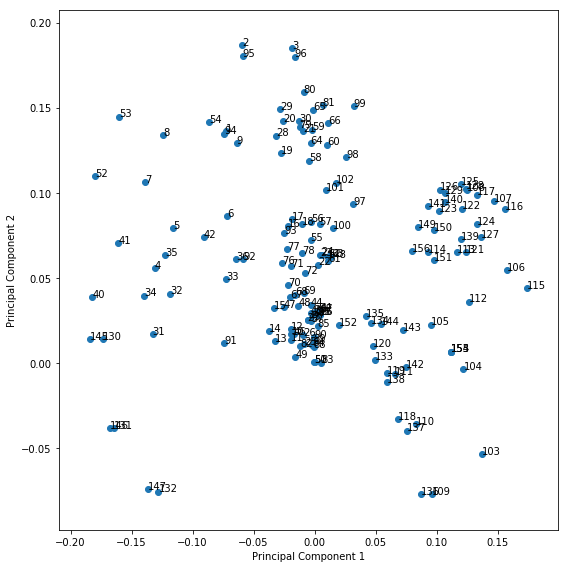

In [75]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [76]:
# Let's look at the scree plot to find the number of Principal Component needed

In [77]:
pca.explained_variance_ratio_

array([1.28949005e-01, 9.30824788e-02, 6.22285595e-02, 5.73091135e-02,
       4.24820108e-02, 3.59303725e-02, 3.41532854e-02, 3.27386417e-02,
       2.45116673e-02, 2.35370354e-02, 1.98954875e-02, 1.90176807e-02,
       1.67600850e-02, 1.64866267e-02, 1.55137009e-02, 1.51158645e-02,
       1.36737559e-02, 1.33410834e-02, 1.29632992e-02, 1.18006676e-02,
       1.15195944e-02, 1.08420985e-02, 1.02853612e-02, 9.94896388e-03,
       9.54841298e-03, 9.18190057e-03, 8.88678468e-03, 8.69826317e-03,
       8.45229563e-03, 8.24119888e-03, 8.00805694e-03, 7.48354835e-03,
       7.20156805e-03, 6.79213203e-03, 6.50289539e-03, 6.27389670e-03,
       6.04569603e-03, 5.93856146e-03, 5.82486170e-03, 5.54438583e-03,
       5.37119159e-03, 5.31904823e-03, 5.19082284e-03, 5.05588529e-03,
       4.77477595e-03, 4.69848651e-03, 4.31209266e-03, 4.06009039e-03,
       3.91007288e-03, 3.86737441e-03, 3.63716428e-03, 3.48551149e-03,
       3.45690903e-03, 3.41167581e-03, 3.26870766e-03, 3.20008261e-03,
      

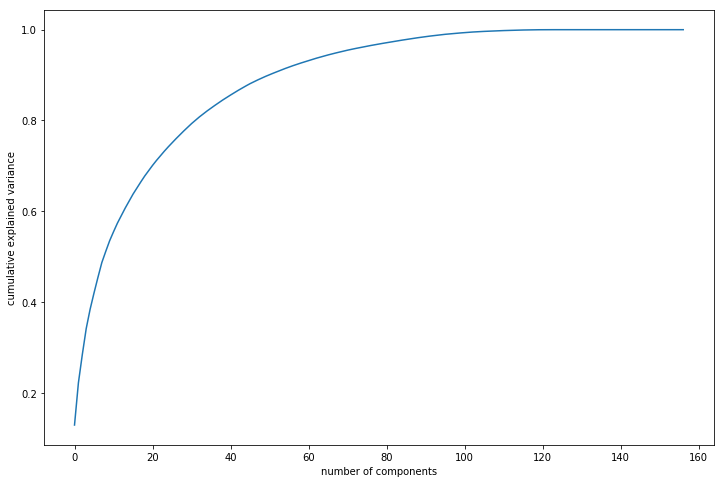

In [78]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [79]:
# We should use incremental PCA as it saves lots of time on large data set

In [80]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=95)

In [81]:
df_train_pca = pca_final.fit_transform(X_train_balanced)
df_train_pca.shape

(38254, 16)

In [82]:
# Creating correlation matrix for the principal components - we expect little to no correlation
corrmat = np.corrcoef(df_train_pca.transpose())

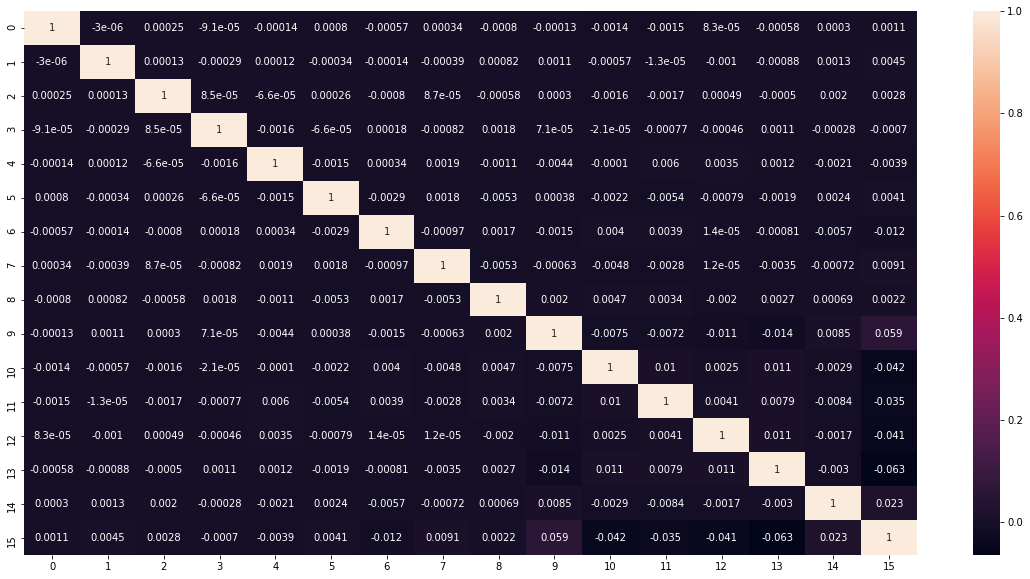

In [83]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [84]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0587632919239112 , min corr:  -0.06330884260523086


In [86]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8954, 16)